In [2]:
columns = ["id_code", "level"]
data_1 = pd.read_csv('../data/dr_data_1/train.csv')
data_1 = data_1.loc[:, ~data_1.columns.str.contains('Unnamed')]

data_2 = pd.read_csv('../data/dr_data_2/train.csv')
data_2 = data_2.loc[:, ~data_2.columns.str.contains('Unnamed')]

test = pd.read_csv('../data/dr_test/test.csv')
test = test.loc[:, ~test.columns.str.contains('Unnamed')]

data = pd.concat([data_1, data_2])
test.columns = columns
data.columns = columns

In [3]:
import pandas as pd
import seaborn as sns

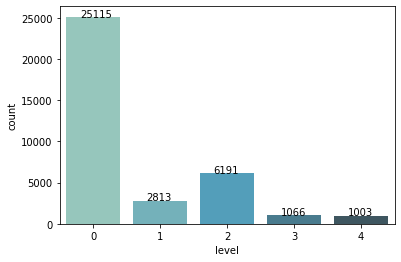

In [4]:
ax = sns.countplot(x="level", data=data, palette="GnBu_d")
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x()+0.2, p.get_height()+3))

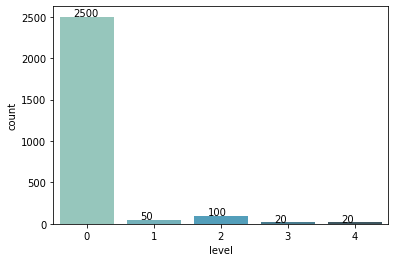

In [5]:
ax = sns.countplot(x="level", data=test, palette="GnBu_d")
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x()+0.2, p.get_height()+3))

In [6]:
def get_number_samples(dataframe):
    label_0 = dataframe[dataframe["diagnosis"] == 0]
    label_1 = dataframe[dataframe["diagnosis"] == 1]
    label_2 = dataframe[dataframe["diagnosis"] == 2]
    label_3 = dataframe[dataframe["diagnosis"] == 3]
    label_4 = dataframe[dataframe["diagnosis"] == 4]
    return {
        "label_0": len(label_0),
        "label_1": len(label_1),
        "label_2": len(label_2),
        "label_3": len(label_3),
        "label_4": len(label_4),
    }

In [7]:
five_fold_data = pd.read_csv('../output/data_5_fold.csv')

samples = {}
for i in range(0, 5):
    fold_number = f"fold_{i}"
    train = five_fold_data[five_fold_data[fold_number] == 'train']
    validation = five_fold_data[five_fold_data[fold_number] == 'validation']
    samples[fold_number] = {
        "train": get_number_samples(train),
        "validation": get_number_samples(validation)
    }
display(samples)

{'fold_0': {'train': {'label_0': 8437,
   'label_1': 2739,
   'label_2': 5991,
   'label_3': 1027,
   'label_4': 944},
  'validation': {'label_0': 361,
   'label_1': 74,
   'label_2': 200,
   'label_3': 39,
   'label_4': 59}},
 'fold_1': {'train': {'label_0': 8437,
   'label_1': 2739,
   'label_2': 5991,
   'label_3': 1027,
   'label_4': 944},
  'validation': {'label_0': 361,
   'label_1': 74,
   'label_2': 200,
   'label_3': 39,
   'label_4': 59}},
 'fold_2': {'train': {'label_0': 8437,
   'label_1': 2739,
   'label_2': 5991,
   'label_3': 1028,
   'label_4': 944},
  'validation': {'label_0': 361,
   'label_1': 74,
   'label_2': 200,
   'label_3': 38,
   'label_4': 59}},
 'fold_3': {'train': {'label_0': 8437,
   'label_1': 2739,
   'label_2': 5991,
   'label_3': 1028,
   'label_4': 944},
  'validation': {'label_0': 361,
   'label_1': 74,
   'label_2': 200,
   'label_3': 38,
   'label_4': 59}},
 'fold_4': {'train': {'label_0': 8437,
   'label_1': 2739,
   'label_2': 5992,
   'label_3':